<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [32]:
import pandas as pd
import piplite
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [33]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [34]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [35]:
await download(file_path, "m2_survey_data.csv")
file_name = "m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [36]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


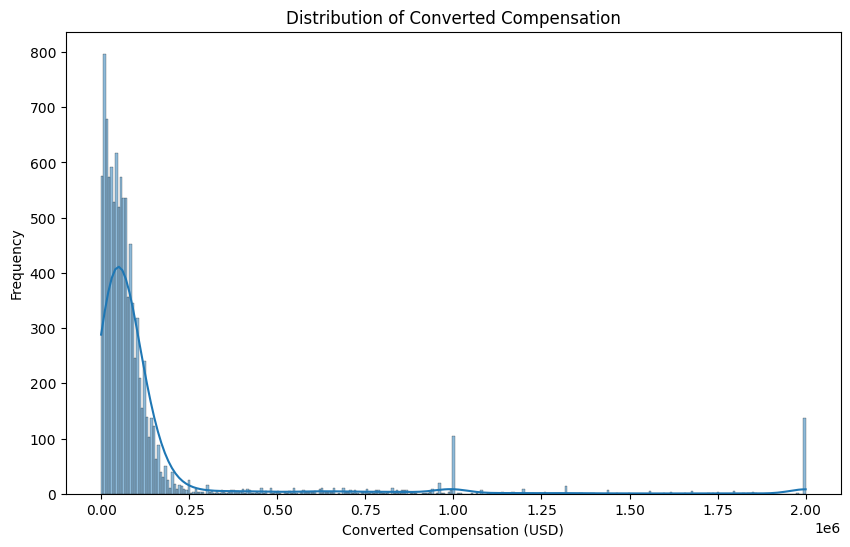

In [37]:
# your code goes here
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'], kde=True)

# Add labels and title
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Converted Compensation')
plt.show()

Plot the histogram for the column `ConvertedComp`.


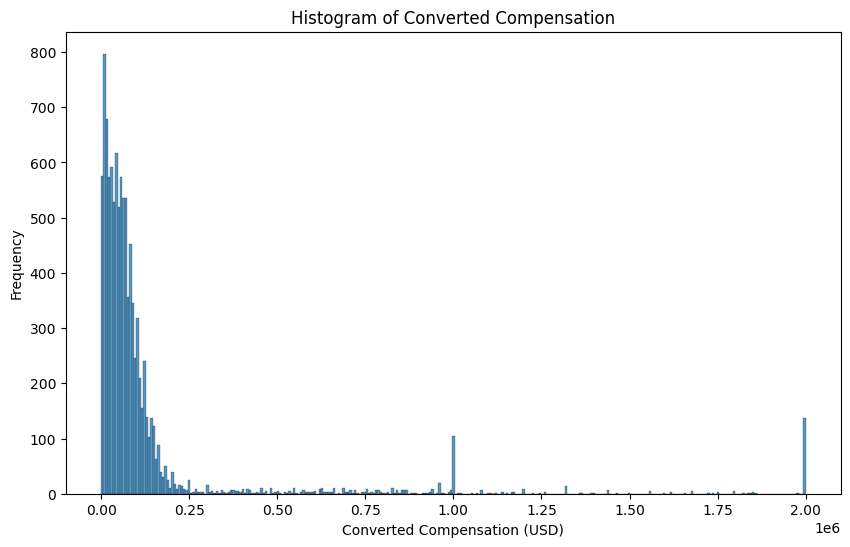

In [38]:
# your code goes here
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'], kde=False)

# Add labels and title
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')

# Show the plot
plt.show()

What is the median of the column `ConvertedComp`?


In [39]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [40]:
# your code goes here
df[df['Gender'] == 'Man'].shape[0]

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [41]:
# your code goes here
df[df['Gender'] == 'Woman']['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [42]:
# your code goes here
summary = df['Age'].describe(percentiles=[.25, .5, .75])

# Print the five-number summary
print("Five-number summary for Age:")
print(summary[['min', '25%', '50%', '75%', 'max']])

Five-number summary for Age:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


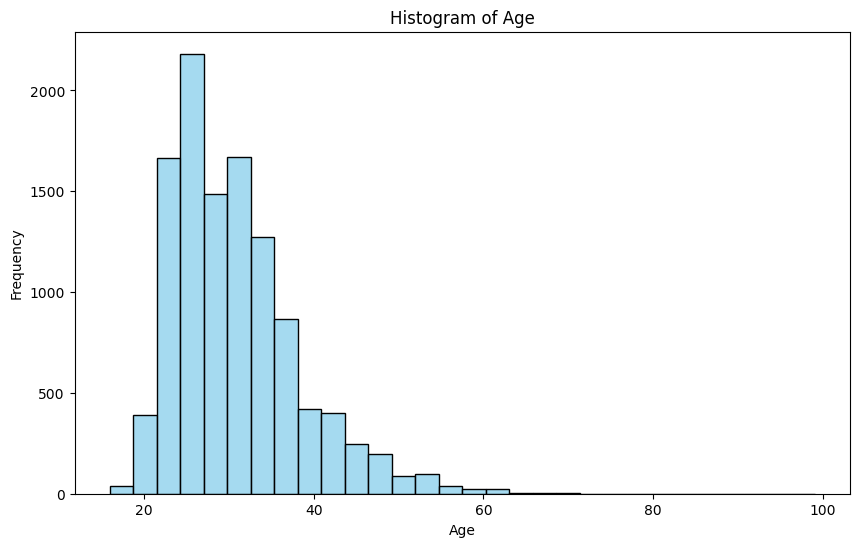

In [43]:
# your code goes here
# your code goes here
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Show plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


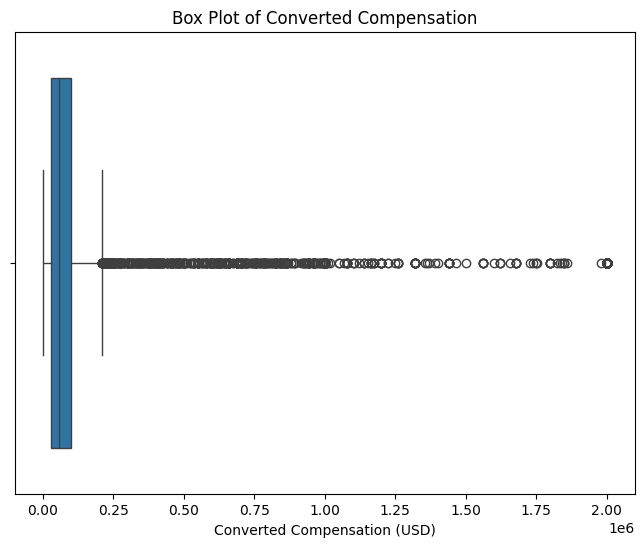

In [44]:
# your code goes here
# your code goes here
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['ConvertedComp'])

# Add labels and title
plt.xlabel('Converted Compensation (USD)')
plt.title('Box Plot of Converted Compensation')

# Show plot
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [45]:
# your code goes here
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Print the results
print(f"The Interquartile Range (IQR) for 'ConvertedComp' is: {IQR}")

The Interquartile Range (IQR) for 'ConvertedComp' is: 73132.0


Find out the upper and lower bounds.


In [46]:
# your code goes here
# your code goes here
# Calculate the first quartile (Q1) and third quartile (Q3) of 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate lower bound and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the results
print(f"Lower bound for potential outliers: {lower_bound}")
print(f"Upper bound for potential outliers: {upper_bound}")

Lower bound for potential outliers: -82830.0
Upper bound for potential outliers: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [47]:
# your code goes here
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

# Print the number of outliers
print(f"Number of outliers in the 'ConvertedComp' column: {num_outliers}")

Number of outliers in the 'ConvertedComp' column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [48]:
# your code goes here
# your code goes here
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Print the shape of the new DataFrame to verify
print(f"Shape of the original DataFrame: {df.shape}")
print(f"Shape of the new DataFrame without outliers: {df_no_outliers.shape}")

# Optionally, you can reset the index of the new DataFrame
df_no_outliers.reset_index(drop=True, inplace=True)

Shape of the original DataFrame: (11398, 85)
Shape of the new DataFrame without outliers: (9703, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [54]:
# your code goes here
#df.corr()['Age']
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from 'ConvertedComp'
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate the mean of 'ConvertedComp' after removing outliers
mean_converted_comp_no_outliers = df_no_outliers['ConvertedComp'].mean()

# Print the mean 'ConvertedComp' after removing outliers
print(f"The mean ConvertedComp after removing outliers is: {mean_converted_comp_no_outliers}")


The mean ConvertedComp after removing outliers is: 59883.20838915799


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
